In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import EPPE_Simulator as eppe
import astropy.constants as const
import time

In [2]:
expTime = 1
intTime = 10*3*24.

In [3]:
systems = eppe.Systems(load=False, nPlanets=1)
teq = 0.25**0.25*systems.catalogue['teff']*np.sqrt(systems.catalogue['rstar']/systems.catalogue['a'])

In [4]:
mission = eppe.mission()

In [5]:
ang = np.linspace(0,360,1000,endpoint=True)
# ang = ang

stokes = np.array([1.,0.,0.,0.]).reshape(-1,1)

In [6]:
eppe.lambert_scatter(ang, stokes).shape

(4, 1000)

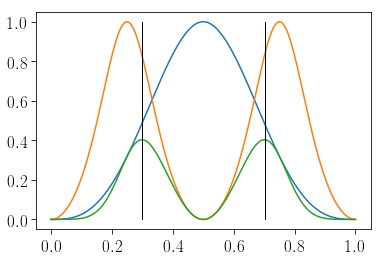

In [41]:
x = np.roll(ang/360., int(len(ang)/2))
y = eppe.lambert_scatter(ang, stokes)[0][np.argsort(x)]
y2 = eppe.rayleigh_scatter(ang)[np.argsort(x)]
x = np.sort(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y*y2)
plt.plot([0.5-73/360., 0.5-73/360.], [0,1], c='k', lw=1)
plt.plot([0.5+73/360., 0.5+73/360.], [0,1], c='k', lw=1)
plt.show()

In [42]:
pc = mission.observe_polarization(systems, systems.catalogue['per']*24./1000., systems.catalogue['per']*24., photonNoise=False)[0]
pc = pc[:,np.argsort(pc[-1,:])]

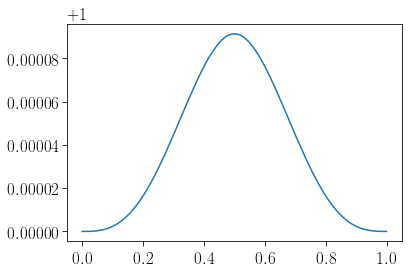

In [47]:
plt.plot(pc[-1], pc[0]/np.min(pc[0]))
plt.show()

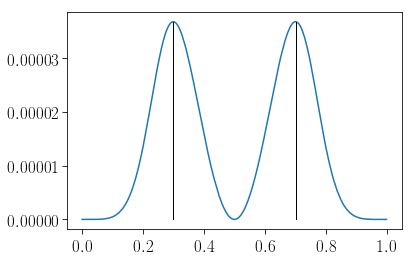

In [50]:
pol = np.sqrt(pc[1]**2+pc[2]**2)/pc[0]
plt.plot(pc[-1], pol)
plt.plot([0.5-73/360., 0.5-73/360.], [0,np.max(pol)], c='k', lw=1)
plt.plot([0.5+73/360., 0.5+73/360.], [0,np.max(pol)], c='k', lw=1)
plt.show()